<h2>Data Science Project 2</h2>
<h4>Matthew Verhey</h4>


In [1]:
#import of necessary libraries
from datascience import *
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import text
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# Data table of injured players
df = Table.read_table('injurydata.csv')
df

Date,Team,Acquired,Relinquished,Notes
2/22/18,76ers,Joel Embiid,nan,returned to lineup
2/22/18,Grizzlies,nan,Chandler Parsons,illness (DTD)
2/22/18,Hawks,nan,Malcolm Delaney,strained right knee (DTD)
2/22/18,Hawks,Dennis Schroder,nan,returned to lineup
2/22/18,Magic,Aaron Gordon,nan,returned to lineup
2/22/18,Nets,Jahlil Okafor,nan,returned to lineup
2/22/18,Hawks,nan,Antonius Cleveland,left ankle injury (DTD)
2/23/18,Clippers,nan,Danilo Gallinari,sprained right hand (DTD)
2/23/18,Jazz,nan,Raul Neto,sprained right ankle (DTD)
2/23/18,Rockets,nan,Eric Gordon,illness (DTD)


In [3]:
# DTD = day-to-day. This implies the injury is not serious.
df = df.drop('Acquired')
df = df.where('Relinquished', are.not_equal_to('nan'))
df = df.where('Notes', are.not_containing('DTD'))
df

Date,Team,Relinquished,Notes
2/24/18,Grizzlies,Marc Gasol,DNP
2/25/18,Timberwolves,Jimmy Butler,surgery on right knee to repair meniscus injury
2/28/18,Lakers,Josh Hart,fractured left hand (out indefinitely)
3/2/18,Clippers,Danilo Gallinari,fractured right hand (out indefinitely)
3/2/18,Lakers,Josh Hart,surgery on left hand to repair fracture (out indefinitely)
3/5/18,Hawks,Malcolm Delaney,sprained left ankle (out for season)
3/5/18,Hornets,Michael Carter-Williams,sprained left shoulder (out for season)
3/8/18,Magic,Evan Fournier,sprained MCL in left knee (out for season)
3/9/18,Celtics,Jaylen Brown,concussion (out indefinitely)
3/9/18,Hornets,Michael Carter-Williams,surgery on left shoulder to repair posterior tear in lab ...


In [4]:
df = df.relabel('Relinquished', 'Name')
df

Date,Team,Name,Notes
2/24/18,Grizzlies,Marc Gasol,DNP
2/25/18,Timberwolves,Jimmy Butler,surgery on right knee to repair meniscus injury
2/28/18,Lakers,Josh Hart,fractured left hand (out indefinitely)
3/2/18,Clippers,Danilo Gallinari,fractured right hand (out indefinitely)
3/2/18,Lakers,Josh Hart,surgery on left hand to repair fracture (out indefinitely)
3/5/18,Hawks,Malcolm Delaney,sprained left ankle (out for season)
3/5/18,Hornets,Michael Carter-Williams,sprained left shoulder (out for season)
3/8/18,Magic,Evan Fournier,sprained MCL in left knee (out for season)
3/9/18,Celtics,Jaylen Brown,concussion (out indefinitely)
3/9/18,Hornets,Michael Carter-Williams,surgery on left shoulder to repair posterior tear in lab ...


In [5]:
stats1718 = Table.read_table('seasonstats.csv')
stats1718
# https://www.nbastuffer.com/2017-2018-nba-player-stats/

RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOr,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
1,Aaron Brooks,Min,PG,33,32,5.9,12.3,19.8,0.13,11,0.727,38,0.447,31,0.355,0.486,0.508,2.3,0.5,5.2,0.6,15,0.19,0,0.34,6,103.1,100.4
2,Aaron Gordon,Orl,SF,22,58,32.9,68.6,24.7,0.1,225,0.698,523,0.497,342,0.336,0.5,0.53,17.6,7.9,13.2,2.3,11.7,1.02,0.78,1.84,8.3,103.6,106.2
3,Aaron Harrison,Dal,SG,23,9,25.9,54,15.5,0.038,17,0.765,26,0.385,43,0.209,0.341,0.392,6.7,2.7,5.7,1.2,6.7,1,0.22,0.33,4.3,87.9,100.8
4,Aaron Jackson,Hou,F,31,1,34.5,71.9,13.9,0.092,2,0.5,5,0.4,4,0.25,0.389,0.405,8,3,4.9,1,4,0,0,1,3.3,91.3,101.6
5,Abdel Nader,Bos,SF,24,48,10.9,22.6,17.1,0.17,39,0.59,84,0.321,65,0.354,0.413,0.439,3,1.5,7.4,0.5,7.2,0.31,0.21,0.71,4.8,83.1,99.1
6,Adreian Payne,Orl,PF,26,5,8.5,17.8,15.1,0.137,6,0.833,7,0.714,3,0.667,0.8,0.831,4.2,1.8,11.6,0,0,0.4,0,0.4,0,140.6,97.1
7,Al Horford,Bos,C,31,72,31.6,65.9,18.4,0.141,120,0.783,527,0.514,226,0.429,0.553,0.575,12.9,7.4,12.7,4.7,23.6,0.6,1.08,1.83,9.7,115.4,100.4
8,Al Jefferson,Ind,C,33,36,13.4,28,22.6,0.086,36,0.833,205,0.541,3,0,0.534,0.563,7,4,16.7,0.8,10.1,0.44,0.64,0.58,8.4,112.9,93.9
9,Alan Williams,Pho,PF,25,5,14.1,29.3,17.5,0.242,9,0.667,18,0.389,0,0,0.389,0.455,4,4.4,16.7,1.6,16.2,1,0.2,1.4,8.6,86.2,90.5
10,Alec Burks,Uta,SG,26,64,16.5,34.5,22.5,0.114,124,0.863,272,0.452,142,0.331,0.467,0.527,7.7,3,10.3,1,10,0.58,0.13,0.94,6.9,102,99.2


In [6]:
#Drop irrelevant columns
stats1718 = stats1718.drop("MIN%")
stats1718 = stats1718.drop("TRB%")
stats1718 = stats1718.drop("VI")
stats1718 = stats1718.drop("AST%")
stats1718 = stats1718.drop("USG%")
stats1718 = stats1718.drop("TOr")

In [7]:
stats1718

RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TOPG,ORTG,DRTG
1,Aaron Brooks,Min,PG,33,32,5.9,11,0.727,38,0.447,31,0.355,0.486,0.508,2.3,0.5,0.6,0.19,0,0.34,103.1,100.4
2,Aaron Gordon,Orl,SF,22,58,32.9,225,0.698,523,0.497,342,0.336,0.5,0.53,17.6,7.9,2.3,1.02,0.78,1.84,103.6,106.2
3,Aaron Harrison,Dal,SG,23,9,25.9,17,0.765,26,0.385,43,0.209,0.341,0.392,6.7,2.7,1.2,1,0.22,0.33,87.9,100.8
4,Aaron Jackson,Hou,F,31,1,34.5,2,0.5,5,0.4,4,0.25,0.389,0.405,8,3,1,0,0,1,91.3,101.6
5,Abdel Nader,Bos,SF,24,48,10.9,39,0.59,84,0.321,65,0.354,0.413,0.439,3,1.5,0.5,0.31,0.21,0.71,83.1,99.1
6,Adreian Payne,Orl,PF,26,5,8.5,6,0.833,7,0.714,3,0.667,0.8,0.831,4.2,1.8,0,0.4,0,0.4,140.6,97.1
7,Al Horford,Bos,C,31,72,31.6,120,0.783,527,0.514,226,0.429,0.553,0.575,12.9,7.4,4.7,0.6,1.08,1.83,115.4,100.4
8,Al Jefferson,Ind,C,33,36,13.4,36,0.833,205,0.541,3,0,0.534,0.563,7,4,0.8,0.44,0.64,0.58,112.9,93.9
9,Alan Williams,Pho,PF,25,5,14.1,9,0.667,18,0.389,0,0,0.389,0.455,4,4.4,1.6,1,0.2,1.4,86.2,90.5
10,Alec Burks,Uta,SG,26,64,16.5,124,0.863,272,0.452,142,0.331,0.467,0.527,7.7,3,1,0.58,0.13,0.94,102,99.2


In [8]:
#Data cleaning
inj_names = df.column("Name")
inj_names_clean = [ ]
for each in inj_names:
    inj_names_clean.append(each.strip())
all_names = stats1718.column('FULL_NAME')
inj_bool_col = [ ]

In [9]:
#Categorizing based on injury by adding a boolean column indicating
#whether or not the player had been injured for the current season
for name in all_names:
    if name.strip() in inj_names_clean:
        inj_bool_col.append(True)
    else:
        inj_bool_col.append(False)

In [10]:
stats1718.append_column('Injured?', inj_bool_col)
stats1718.sort('Injured?', descending=True)

RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TOPG,ORTG,DRTG,Injured?
589,Wesley Matthews,Dal,SG,31,63,33.8,101,0.822,295,0.441,402,0.381,0.516,0.541,12.7,3.1,2.7,1.21,0.25,1.32,105.1,106.9,True
576,Tyson Chandler,Pho,C,35,46,25,94,0.617,187,0.647,0,0,0.647,0.657,6.5,9.1,1.2,0.35,0.59,1.28,122.3,104.5,True
565,Troy Williams,Nyk,SF,23,17,17.1,27,0.704,67,0.567,33,0.333,0.545,0.572,7.5,3.5,0.9,1.12,0.24,1.06,108.7,100.5,True
564,Troy Williams,Hou,SF,23,4,4.3,3,0.333,4,0.5,5,0,0.222,0.242,1.3,1,0.3,0.25,0,0.25,59.2,94.2,True
539,Tim Hardaway Jr.,Nyk,SG,25,57,33.1,179,0.816,446,0.516,410,0.317,0.496,0.533,17.5,3.9,2.7,1.11,0.18,1.61,106.3,108.6,True
531,Terrance Ferguson,Okc,SG,19,61,12.5,10,0.9,49,0.612,120,0.333,0.533,0.545,3.1,0.8,0.3,0.39,0.16,0.18,114.9,102.2,True
524,Stephen Curry,Gol,PG,29,51,32,302,0.921,363,0.595,501,0.423,0.618,0.675,26.4,5.1,6.1,1.57,0.16,3,124.7,104.1,True
520,Skal Labissiere,Sac,PF,21,60,20.7,118,0.805,407,0.459,51,0.353,0.467,0.513,8.7,4.8,1.2,0.42,0.82,1.22,102.9,103.6,True
515,Shane Larkin,Bos,PG,25,54,14.3,37,0.865,133,0.398,86,0.36,0.454,0.491,4.3,1.7,1.8,0.54,0.06,0.61,104.7,100.2,True
503,Salah Mejri,Dal,C,31,61,11.9,66,0.576,134,0.657,3,0,0.642,0.644,3.5,4,0.6,0.36,1.1,0.64,122.8,91.7,True


In [11]:
inj_stats = stats1718.where('Injured?', are.equal_to(True))
non_inj_stats = stats1718.where('Injured?', are.not_equal_to(True))

In [12]:
#Convert tables to dataframes for visualization purposes
pd_inj = Table.to_df(inj_stats)
pd_non_inj = Table.to_df(non_inj_stats)

#Helper function for cleaning visualizations
def remove_axes_labels(axes):
    axes.set_ylabel(ylabel="")
    axes.set_xlabel(xlabel="")

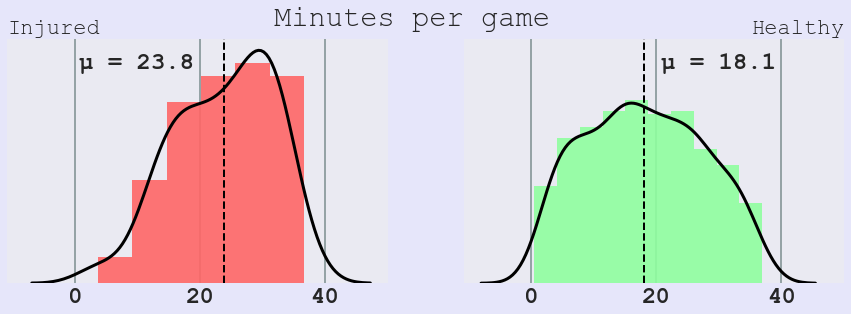

In [13]:
#Visualization One: Distribution of Minutes Per Game for injured and healthy players

plt.rcParams.update({'font.size': 24, 'font.family':'Courier New', 'font.weight':'bold'})
mean1 = round(pd_inj['MPG'].mean(),1)
mean2 = round(pd_non_inj['MPG'].mean(),1)

dist_fig, [p1, p2]  = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15,4.5), facecolor="lavender")
p1.axes.set_yticks([])
p1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p1.set_title("Injured", fontdict={"fontsize":22}, loc='left')
p2.set_title("Healthy", fontdict={"fontsize":22}, loc='right')

dist_fig.suptitle("Minutes per game")

p1.axes.set_xticks(ticks=[0,20,40])
mpg_inj_dist = sns.distplot(pd_inj['MPG'], ax=p1, axlabel="",
                            color='#ff6666', kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})

p1.axvline(pd_inj['MPG'].mean(), color='k', linestyle='dashed', linewidth=2)
text(0.34, 0.9,'μ = ''{}'.format(mean1), ha='center', va='center', transform=p1.transAxes)

p2.axvline(pd_non_inj['MPG'].mean(), color='k', linestyle='dashed', linewidth=2)
text(0.67, 0.9,'μ = ''{}'.format(mean2), ha='center', va='center', transform=p2.transAxes)

mpg_noninj_dist = sns.distplot(pd_non_inj['MPG'], ax=p2, axlabel="", 
                               color='xkcd:mint green',kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})



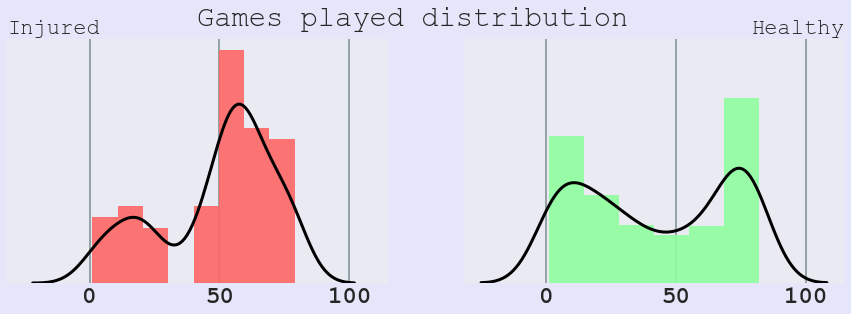

In [14]:
d_fig, [p_1, p_2]  = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15,4.5), facecolor="lavender")
p_1.axes.set_yticks([])
p_1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p_2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p_1.set_title("Injured", fontdict={"fontsize":22}, loc='left')
p_2.set_title("Healthy", fontdict={"fontsize":22}, loc='right')

d_fig.suptitle("Games played distribution")


gp_inj_dist = sns.distplot(pd_inj['GP'], ax=p_1, axlabel="",
                            color='#ff6666', kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})



gp_noninj_dist = sns.distplot(pd_non_inj['GP'], ax=p_2, axlabel="", 
                               color='xkcd:mint green',kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})



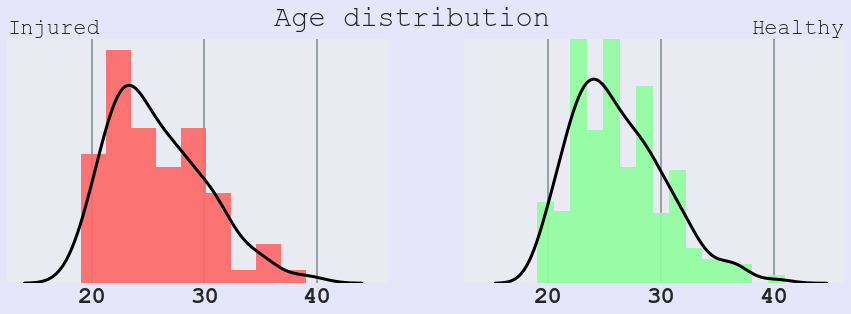

In [15]:
d_fg, [p_x1, p_x2]  = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15,4.5), facecolor="lavender")
p_x1.axes.set_yticks([])
p_x1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p_x2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
p_x1.set_title("Injured", fontdict={"fontsize":22}, loc='left')
p_x2.set_title("Healthy", fontdict={"fontsize":22}, loc='right')

d_fg.suptitle("Age distribution")


age_inj_dist = sns.distplot(pd_inj['AGE'], ax=p_x1, axlabel="",
                            color='#ff6666', kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})



age_noninj_dist = sns.distplot(pd_non_inj['AGE'], ax=p_x2, axlabel="", 
                               color='xkcd:mint green',kde_kws={"color":"black","linewidth":3}, hist_kws={"alpha":.90})



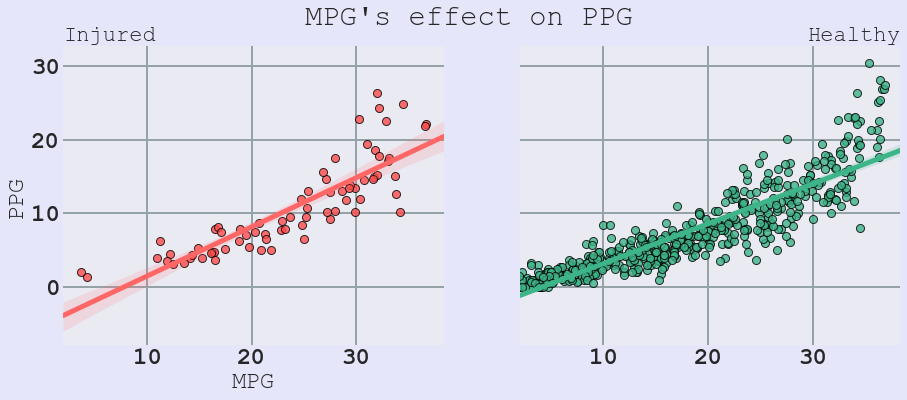

In [16]:
#Visualization Two: Regplots of MPG's effect on PPG

reg_fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5.50), sharex=True, sharey=True, facecolor="lavender")
a1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
a1.set_title("Injured", fontdict={"fontsize":22}, loc='left')
a2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
a2.set_title("Healthy", fontdict={"fontsize":22}, loc='right')
reg_fig.suptitle("MPG's effect on PPG")

inj_mpg_ppg = sns.regplot(x = pd_inj['MPG'], y=pd_inj['PPG'], ax = a1, ci=95,
                          line_kws={"color":"#ff6666","linewidth":"5"},
                          scatter_kws={"s":45,"color":"#ff4c4c", "edgecolor":"black", "linewidth":"1", "s":65})


noninj_mpg_ppg = sns.regplot(x = pd_non_inj['MPG'], y=pd_non_inj['PPG'], ax = a2, ci=95,
                             line_kws={"color":"#3eb489","linewidth":"5"},
                             scatter_kws={"s":45,"color":"#3eb489", "edgecolor":"black", "linewidth":"1", "s":65})

remove_axes_labels(a2)


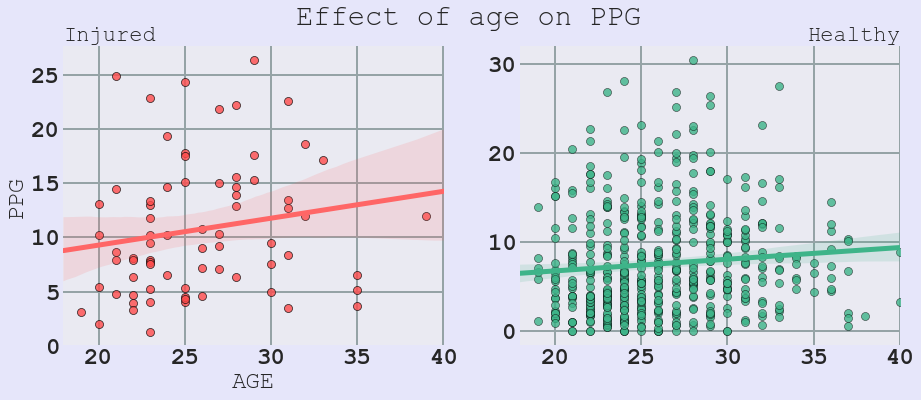

In [17]:
#Visualization Three: Regplots of the effect of age on PPG

reg_fig2, (a_one, a_two) = plt.subplots(nrows=1, ncols=2, figsize=(15,5.5), sharex=True, sharey=False, facecolor="lavender")
a_one.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
a_two.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
reg_fig2.suptitle("Effect of age on PPG")
a_one.set_title("Injured", fontdict={"fontsize":22}, loc='left')
a_two.set_title("Healthy", fontdict={"fontsize":22}, loc='right')


inj_age_ppg = sns.regplot(x = pd_inj['AGE'], y=pd_inj['PPG'], ax = a_one, ci=95,
                          line_kws={"color":"#ff6666","linewidth":"5"},
                          scatter_kws={"color":"#ff4c4c", "edgecolor":"black", "linewidth":".75", "s":65})

noninj_age_ppg = sns.regplot(x = pd_non_inj['AGE'], y=pd_non_inj['PPG'], ax = a_two, ci=95,
                            line_kws={"color":"#3eb489","linewidth":"5"}, 
                            scatter_kws={"s":45,"color":"#3eb489", "edgecolor":"black", "linewidth":".5", "s":65})

remove_axes_labels(a_two)



<h1>Since the distribution of games played was not normal, the following regression plot is unnecessary</h1>

In [18]:
# #Visualization Four: Regplots of the effect of games played on PPG

# reg_fig3, (a_3, a_4) = plt.subplots(nrows=1, ncols=2, figsize=(15,5.5), sharex=True, sharey=True, facecolor="lavender")
# a_3.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
# a_4.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
# reg_fig3.suptitle("Effect of games played on PPG")
# a_3.set_title("Injured", fontdict={"fontsize":22}, loc='left')
# a_4.set_title("Healthy", fontdict={"fontsize":22}, loc='right')


# inj_age_gp = sns.regplot(x = pd_inj['GP'], y=pd_inj['PPG'], ax = a_3, ci=95,
#                           line_kws={"color":"#ff6666","linewidth":"5"},
#                           scatter_kws={"color":"#ff4c4c", "edgecolor":"black", "linewidth":".75", "s":65})

# noninj_age_gp = sns.regplot(x = pd_non_inj['GP'], y=pd_non_inj['PPG'], ax = a_4, ci=95,
#                             line_kws={"color":"#3eb489","linewidth":"5"}, 
#                             scatter_kws={"s":45,"color":"#3eb489", "edgecolor":"black", "linewidth":".5", "s":65})

# remove_axes_labels(a_4)


In [19]:
from sklearn.linear_model import LinearRegression
#Acquire variables for linear regression
X_inj = pd_inj["MPG"]
Y_inj = pd_inj["PPG"]
X_non_inj = pd_non_inj["MPG"]
Y_non_inj = pd_non_inj["PPG"]

In [20]:
import statsmodels.api as sm
#Regression of MPG on injured players
model = sm.OLS(Y_inj,X_inj).fit()
print(model.summary())
model_1 = sm.OLS(Y_non_inj,X_non_inj).fit()
#Regression of MPG on non-injured players
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPG   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     799.4
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.02e-40
Time:                        21:01:54   Log-Likelihood:                -196.13
No. Observations:                  73   AIC:                             394.3
Df Residuals:                      72   BIC:                             396.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MPG            0.4718      0.017     28.273      0.0

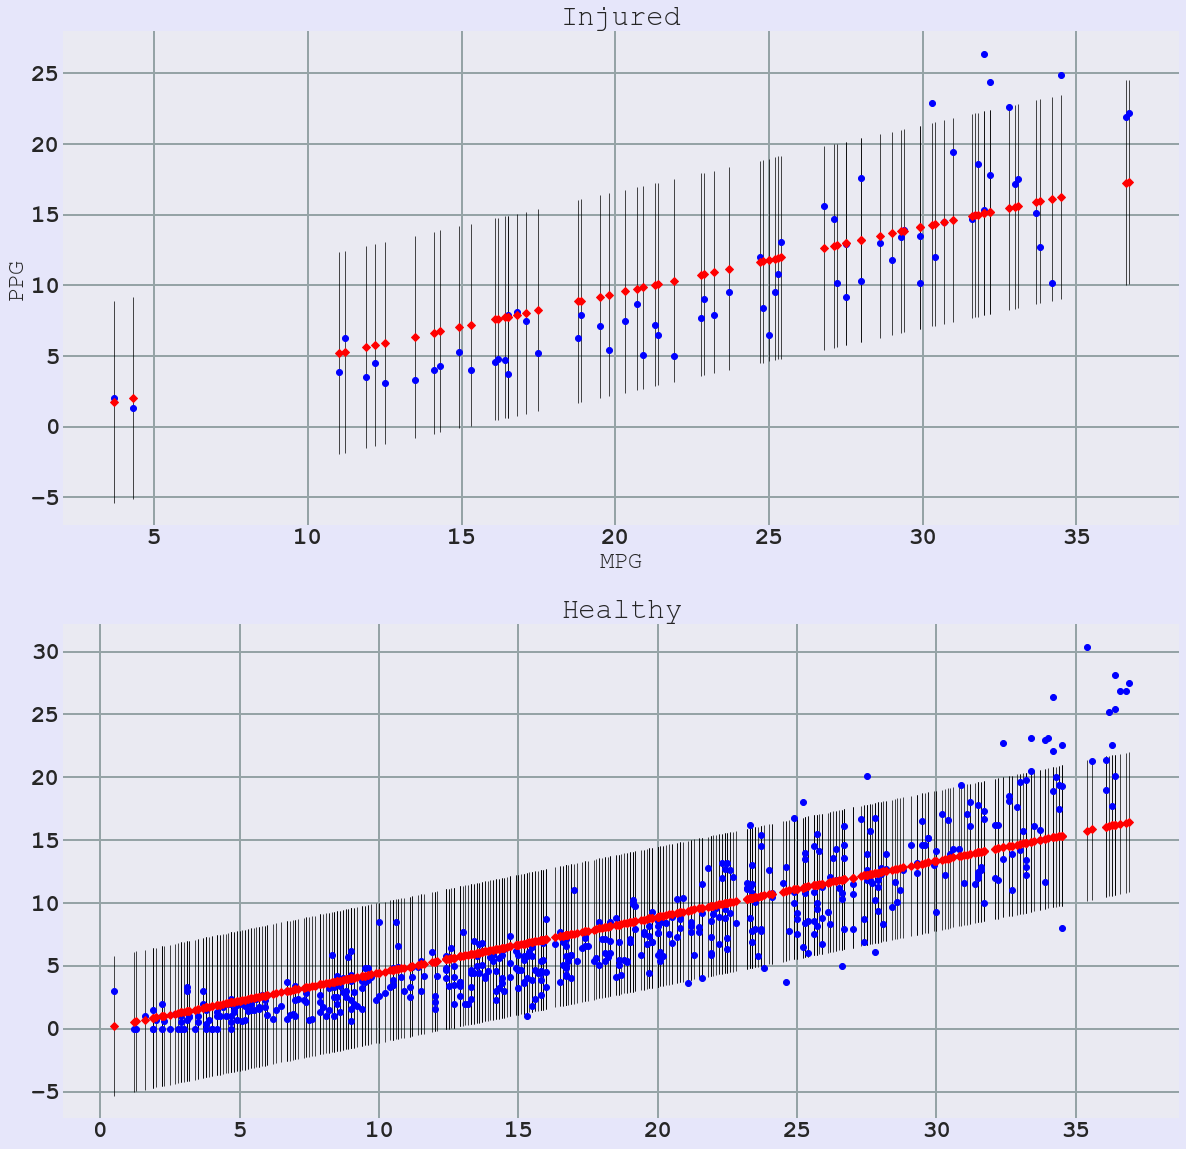

In [21]:
#Visualization Five: Regression plot of the effect of MPG on PPG model

figure, (axes_1,axes_2) = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

axes_1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
axes_2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)

figure = sm.graphics.plot_fit(model,0,ax=axes_1)
figure = sm.graphics.plot_fit(model_1, 0 , ax=axes_2)

figure.set_facecolor('lavender')

#axes_1.set_title("Injured")

#axes_2.set_title("Healthy")
axes_1.set_title("Injured")
axes_2.set_title("Healthy")
axes_1.get_legend().remove()
axes_2.get_legend().remove()
remove_axes_labels(axes_2)

In [22]:
#Age regressions
age_inj_model = sm.OLS(Y_inj, pd_inj['AGE']).fit()
#print(age_inj_model.summary())

age_noninj_model = sm.OLS(np.nan_to_num(Y_non_inj), np.nan_to_num(pd_non_inj['AGE'])).fit()
#print(age_noninj_model.summary())

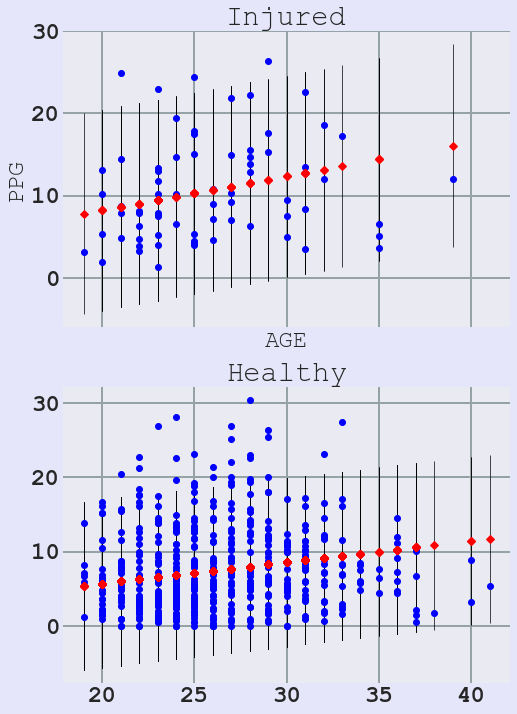

In [23]:
#Visualization Six: Regression plot of the effect of age on PPG model

fig_age, (first, second) = plt.subplots(nrows=2, ncols=1, figsize=(8,12), sharex=True)

first.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
second.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
figure_gp = sm.graphics.plot_fit(age_inj_model,0,ax=first)
figure = sm.graphics.plot_fit(age_noninj_model, 0 , ax=second)
figure.set_facecolor('lavender')


first.set_title("Injured")
second.set_title("Healthy")
first.get_legend().remove()
second.get_legend().remove()
remove_axes_labels(second)

In [24]:
# #Models with Games Played as predictor value
# inj_gp_model = sm.OLS(Y_inj, pd_inj['GP']).fit()
# non_inj_gp_model = sm.OLS(Y_non_inj, pd_non_inj['GP']).fit()

# print(inj_gp_model.summary())
# print(non_inj_gp_model.summary())

In [25]:
# #Visualization Seven: Regression plot of the effect of games played on PPG model

# figure_gp, (axe_1,axe_2) = plt.subplots(nrows=2, ncols=1, figsize=(15,15) )
# axe_1.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
# axe_2.grid(color='xkcd:cool grey', linestyle='-', linewidth=2)
# figure_gp = sm.graphics.plot_fit(inj_gp_model,0,ax=axe_1)
# figure = sm.graphics.plot_fit(non_inj_gp_model, 0 , ax=axe_2)
# figure.set_facecolor('lavender')


# axe_1.set_title("Injured")
# axe_1.get_legend().remove()
# axe_2.get_legend().remove()
# axe_2.set_title("Healthy")

In [26]:
#Results for injured players
inj_results_table = Table()
inj_variables = ["MPG", "Age"]
inj_means = [pd_inj['MPG'].mean(), pd_inj['AGE'].mean()]
inj_r_squares = [model.rsquared, age_inj_model.rsquared]
inj_t_vals = [model.tvalues[0], age_inj_model.tvalues[0]]
inj_results_table.append_column("Variable",inj_variables)
inj_results_table.append_column("Mean",inj_means)
inj_results_table.append_column("R squared",inj_r_squares)
inj_results_table.append_column('T values', inj_t_vals)

print("Results for injured players")
inj_results_table


Results for injured players


Variable,Mean,R squared,T values
MPG,23.8493,0.917371,28.273
Age,25.863,0.760422,15.1171


In [27]:
#Results for non-injured players
non_inj_results_table = Table()
non_inj_variables = ["MPG", "Age"]
non_inj_means = [pd_non_inj['MPG'].mean(), pd_non_inj['AGE'].mean()]
non_inj_r_squares = [model_1.rsquared, age_noninj_model.rsquared]
non_inj_t_vals = [model_1.tvalues[0], age_noninj_model.tvalues[0]]
non_inj_results_table.append_column("Variable",non_inj_variables)
non_inj_results_table.append_column("Mean",non_inj_means)
non_inj_results_table.append_column("R squared",non_inj_r_squares)
non_inj_results_table.append_column('T values',non_inj_t_vals)
print("Results for healthy players")
non_inj_results_table

Results for healthy players


Variable,Mean,R squared,T values
MPG,18.1,0.911561,73.9112
Age,26.1789,0.633687,30.2795


In [28]:
#Helper function to calculate difference between two values
def diff_calc(n1, n2):
    return round(abs(n1 - n2),2)

#Column of mean differences
mean_diff = [diff_calc(pd_non_inj['MPG'].mean(), pd_inj['MPG'].mean()),
             diff_calc(pd_non_inj['AGE'].mean(), pd_inj['AGE'].mean())]

#Column of r squared differences
rsquared_diff = [diff_calc(model.rsquared, model.rsquared),
                diff_calc(age_noninj_model.rsquared, age_inj_model.rsquared)]

#Column of tvalue differences
tval_diff = [diff_calc(model_1.tvalues[0], model.tvalues[0]),
             diff_calc(age_noninj_model.tvalues[0], age_inj_model.tvalues[0])]

In [29]:
#Table containing the difference in key values for injured vs. healthy players
diff_Tab = Table()
diff_Tab.append_column("Variables", non_inj_variables)
diff_Tab.append_column("mean difference",mean_diff)
diff_Tab.append_column("r_Squared difference",rsquared_diff)
diff_Tab.append_column("t val difference",tval_diff)
print("Difference in values between injured and healthy players")
diff_Tab

Difference in values between injured and healthy players


Variables,mean difference,r_Squared difference,t val difference
MPG,5.75,0,45.64
Age,0.32,0.13,15.16
